# Tarea semanal 13

## Síntesis de Funciones Transferencia Cargadas


In [41]:
from IPython.display import IFrame
IFrame("pdf/TS13_enunciado.pdf", width=500, height=1500)

In [42]:
from IPython.display import IFrame
IFrame("pdf/TS13_reso.pdf", width=500, height=1500)

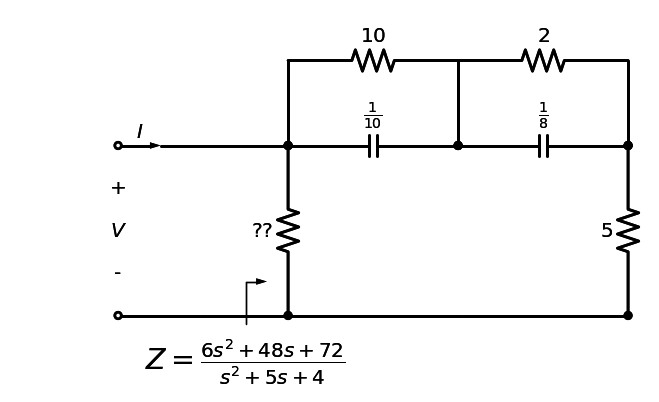

In [40]:

import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor


# Resolución simbólica

s = sp.symbols('s ', complex=True)

# Consignas del ejercicio: resonancias de dos tanques RC
sigma1 = 1
sigma2 = 4

# Sea la siguiente función de excitación

ZZ = 6*(s**2+8*s+12)/(s**2+5*s+4)

Z2 = sp.simplify(ZZ-1)

Ra = 1

Z4, Z3, R1, C1 = tc2.remover_polo_sigma(Z2, sigma1, isImpedance = True)

Z6, Z5, R2, C2 = tc2.remover_polo_sigma(Z4, sigma2, isImpedance = True)

Rc = Z6

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Z',  
                                          ZZ, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)

d = tc2.dibujar_elemento_derivacion(d, Resistor, Ra)

d = tc2.dibujar_tanque_RC_serie(d, R1, C1)
    
d = tc2.dibujar_tanque_RC_serie(d, R2, C2)

d = tc2.dibujar_elemento_derivacion(d, Resistor, Rc)

display(d)


# Falta/No encontré

Una función que me permita sacar un polo parcialmente en infinito para dejar un cero en tal lugar de jw.
Para simular el segundo circuito fácilmente



# Simulación LT spice


# Circuito:

Existe una pequeña correción entre la simulación y la resolución. En la resolución puse el valor del capacitor del tanque en derivación como 18, pero me olvidé de dividir por $w^2$. Por lo que en realidad ese valor es 2.

![img](img/2_circuito.png)

En análisis de frecuencia nos devuelve el siguiente gráfico:

![img](img/2_ac.png)

Podemos observar con el puntero que el cero de trasmisión está en w = 3

![img](img/2_ac_cero.png)

Podemos observar con los punteros que la pendiente es de 20db/decada por lo que estamos en un filtro de orden 1 como el enunciado(Luego del cero de trasmisión).

![img](img/2_ac_pendiente.png)

